# Images as arrays

In [1]:
#%matplotlib inline #for inline visualization of images/plots in notebook
import numpy as np
from matplotlib import pyplot as plt

## <span class="exercize">Exercise: draw the letter H</span>

Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns a copy with a green letter H overlaid at those coordinates. The coordinates point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

In [2]:
from skimage import img_as_float

def draw_H(image, coords, color=(0, 255, 0)):
    out = image.copy()
    
    canvas = out[coords[0]:coords[0] + 24,
                 coords[1]:coords[1] + 20]
    
    canvas[:, :3] = color
    canvas[:, -3:] = color
    canvas[11:14] = color
    
    return out

Test your function like so:

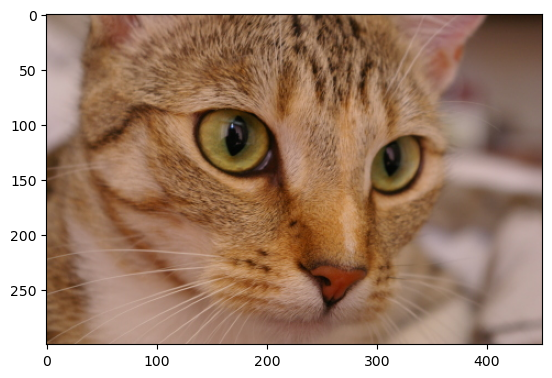

In [4]:
from skimage import data
cat = data.chelsea()
plt.imshow(cat)

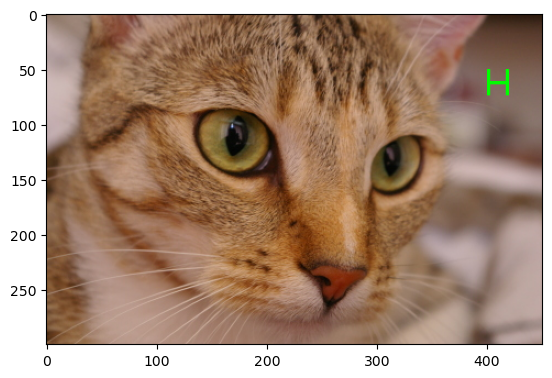

In [3]:
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H)

## <span class="exercize">Exercise: visualizing RGB channels</span>

Display the different color channels of the image along (each as a gray-scale image).  Start with the following template:

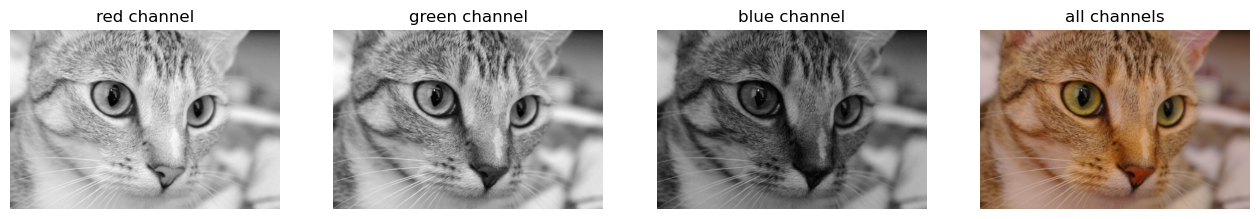

In [9]:
# --- read in the image ---
#from skimage import data
image = data.cat()

# --- assign each color channel to a different variable ---

r = image[..., 0]
g = image[..., 1]
b = image[..., 2]

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

Now, take a look at the following R, G, and B channels.  How would their combination look? (Write some code to confirm your intuition.)

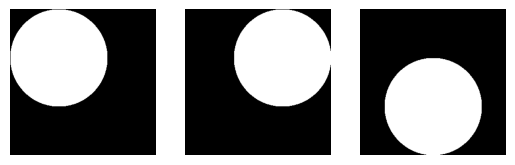

In [10]:
from skimage import draw

red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.disk(center=(100, 100), radius=100)
red[r, c] = 1

r, c = draw.disk(center=(100, 200), radius=100)
green[r, c] = 1

r, c = draw.disk(center=(200, 150), radius=100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')

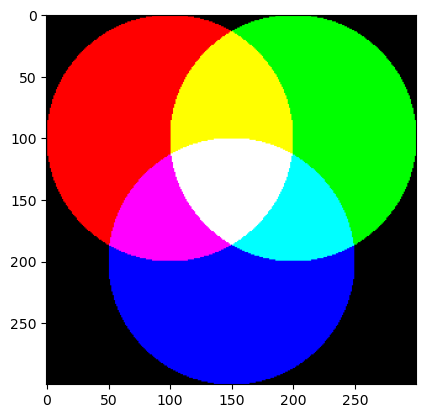

In [11]:
plt.imshow(np.stack([red, green, blue], axis=2));

# Create color palettes
Let's use the R-G-B colors and the fact that images are (stacks of) arrays. Here you find some examples of color mixing, but not all possible mixing variations. Test other options!

In [15]:
import numpy as np

# Original array, 5x5 px, with increasing pixel value (intensity)
array = np.arange(0, 250, 10).reshape(5, 5)
# Rotate 90 degrees to the right
rotated_right = np.rot90(array, k=-1)
# Rotate 90 degrees to the left
rotated_left = np.rot90(array, k=1)
print("Original Array:\n", array)

Original Array:
 [[  0  10  20  30  40]
 [ 50  60  70  80  90]
 [100 110 120 130 140]
 [150 160 170 180 190]
 [200 210 220 230 240]]


(([], []), ([], []))

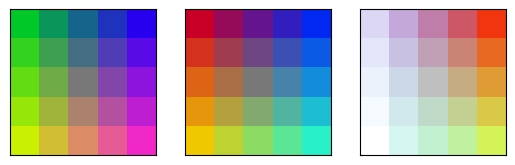

In [18]:
#R-G-B, use np.stack() to combine 2D arrays to create a composite (3 color) image
plt.subplot(131),plt.imshow(np.stack([array, rotated_right, rotated_left], axis=2)) 
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(np.stack([rotated_right, array, rotated_left], axis=2)) 
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(np.stack([rotated_left, array, rotated_right, rotated_left], axis=2)) 
plt.xticks([]), plt.yticks([])

## Exercise: Convert to grayscale ("black and white")

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image according to the formula above.

Compare your results to that obtained with `skimage.color.rgb2gray`.

Change the coefficients to 1/3 (i.e., take the mean of the red, green, and blue channels, to see how that approach compares with `rgb2gray`).

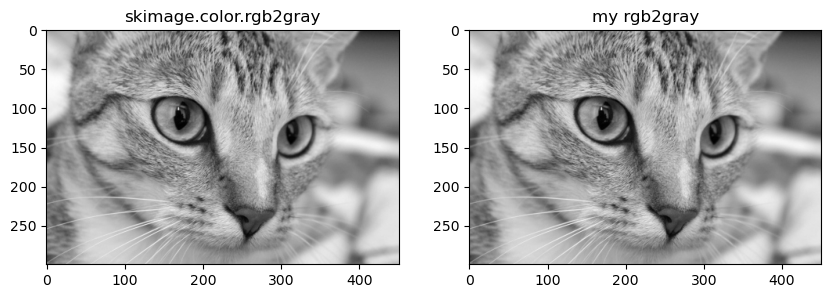

In [13]:
from skimage import io, color, img_as_float

image = data.cat() #img_as_float(io.imread('../../images/balloon.jpg'))

gray = color.rgb2gray(image)
my_gray = image @ [0.2126, 0.7152, 0.0722]

# --- display the results ---

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray');

In [14]:
# Let's calculate the mean intensity error, as compared to
# scikit-image's color.rgb2gray

import numpy as np
np.mean(np.abs(gray - my_gray))

116.90693642601916